In [11]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pvlib

In [12]:
weather = pd.read_csv("weather_test.csv")
temp_data = pd.DataFrame(weather.tavg)
weather.index = pd.date_range(start='2017-01-01', end='2019-12-31', freq='D')
temp_data.index = weather.index

In [13]:
import pandas as pd
import pvlib

# Set location information (latitude, longitude, and elevation)
latitude = 12.971598
longitude = 77.594562
altitude = 920
tz = 'Asia/Kolkata'

weather_data = temp_data.tavg
times = weather_data.index
location = pvlib.location.Location(latitude, longitude, tz=tz)

# Calculate solar position
solar_position = pvlib.solarposition.get_solarposition(times, latitude, longitude)

# Calculate extraterrestrial radiation
dni_extra = pvlib.irradiance.get_extra_radiation(times)

# Calculate air mass, replacing NaN values with a default value (e.g., 10)
airmass = pvlib.atmosphere.get_relative_airmass(solar_position['apparent_zenith']).fillna(10)

# Assuming no direct horizontal irradiance (dhi) available, set it to zero
dhi = pd.Series(0, index=times)

# Calculate the solar panel tilt and azimuth dynamically based on solar position
solar_panel_tilt = 90 - solar_position['apparent_elevation']
solar_panel_azimuth = solar_position['azimuth']

# Ensure tilt values are within a reasonable range (0 to 90 degrees)
solar_panel_tilt = solar_panel_tilt.clip(0, 90)

# Use temperature data from your CSV file
temp_air = temp_data['tavg']

# Calculate total radiation on a tilted surface with dynamic tilt and azimuth
total_irradiance_dynamic = pvlib.irradiance.get_total_irradiance(
    solar_panel_tilt, solar_panel_azimuth, solar_position['apparent_zenith'],
    solar_position['azimuth'], dni_extra, dhi, airmass)

# Convert irradiance to energy (assuming a 1 kW system)
system_size_kw = 3
energy_dynamic = total_irradiance_dynamic * 7.5 * system_size_kw/1000

# Create a pandas DataFrame to store the results
result_df_dynamic = pd.DataFrame(index=times)
result_df_dynamic['Energy_Generated_KWh'] = energy_dynamic['poa_global']
result_df_dynamic['Temperature_C'] = temp_air  # Use the existing temperature data

# Print the resulting DataFrame with dynamic tilt and azimuth
print(result_df_dynamic)

            Energy_Generated_KWh  Temperature_C
2017-01-01             30.525160           21.0
2017-01-02             30.509904           21.6
2017-01-03             30.494604           22.3
2017-01-04             30.479289           21.8
2017-01-05             30.463982           21.9
...                          ...            ...
2019-12-27             30.612560           23.4
2019-12-28             30.597795           21.9
2019-12-29             30.582850           21.8
2019-12-30             30.567747           21.7
2019-12-31             30.552514           21.9

[1095 rows x 2 columns]


<Axes: >

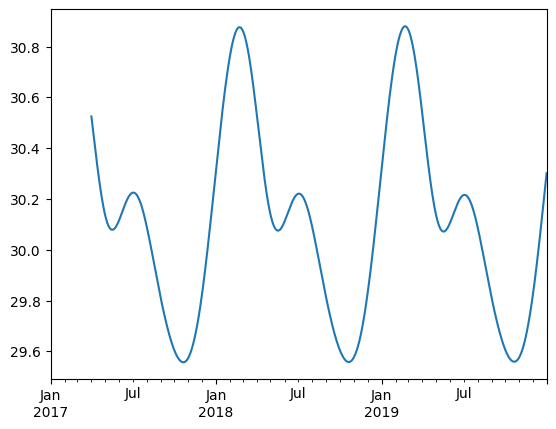

In [14]:
result_df_dynamic["Energy_Generated_KWh"] = result_df_dynamic["Energy_Generated_KWh"].shift(90).dropna()
result_df_dynamic["Energy_Generated_KWh"].plot()

In [15]:
result_df_dynamic.dropna(inplace=True)

noise

In [16]:
import pandas as pd
import pvlib

# Set location information (latitude, longitude, and elevation)
latitude = 12.971598
longitude = 77.594562
altitude = 920
tz = 'Asia/Kolkata'

weather_data = temp_data.tavg
times = weather_data.index
location = pvlib.location.Location(latitude, longitude, tz=tz)

# Calculate solar position
solar_position = pvlib.solarposition.get_solarposition(times, latitude, longitude)

# Calculate extraterrestrial radiation
dni_extra = pvlib.irradiance.get_extra_radiation(times)

# Calculate air mass, replacing NaN values with a default value (e.g., 10)
airmass = pvlib.atmosphere.get_relative_airmass(solar_position['apparent_zenith']).fillna(10)

# Assuming no direct horizontal irradiance (dhi) available, set it to zero
dhi = pd.Series(0, index=times)

# Calculate the solar panel tilt and azimuth dynamically based on solar position
solar_panel_tilt = 90 - solar_position['apparent_elevation']
solar_panel_azimuth = solar_position['azimuth']

# Ensure tilt values are within a reasonable range (0 to 90 degrees)
solar_panel_tilt = solar_panel_tilt.clip(0, 90)

# Use temperature data from your CSV file
temp_air = temp_data['tavg']


# Generate random noise for temperature and irradiance
noise_temp = np.random.normal(0, 2, len(times))  # Adjust the parameters based on your preference
noise_irradiance = np.random.normal(0, 50, len(times))  # Adjust the parameters based on your preference

# Add noise to the temperature and irradiance variables
temp_air_with_noise = temp_air + noise_temp
total_irradiance_dynamic_with_noise = pvlib.irradiance.get_total_irradiance(
    solar_panel_tilt, solar_panel_azimuth, solar_position['apparent_zenith'],
    solar_position['azimuth'], dni_extra, dhi, airmass)['poa_global'] + noise_irradiance

# Convert irradiance to energy (assuming a 1 kW system)
system_size_kw = 3
energy_dynamic_with_noise = total_irradiance_dynamic_with_noise * 7.5 * system_size_kw / 1000

# Create a pandas DataFrame to store the results with noise
result_df_dynamic_with_noise = pd.DataFrame(index=times)
result_df_dynamic_with_noise['Energy_Generated_KWh'] = energy_dynamic_with_noise
result_df_dynamic_with_noise['Temperature_C'] = temp_air_with_noise

# Print the resulting DataFrame with noise
print(result_df_dynamic_with_noise)

            Energy_Generated_KWh  Temperature_C
2017-01-01             30.254286      20.507225
2017-01-02             29.477626      21.346532
2017-01-03             30.317197      22.463640
2017-01-04             31.252751      21.861981
2017-01-05             30.001559      22.533680
...                          ...            ...
2019-12-27             30.171563      23.893602
2019-12-28             30.587784      22.454415
2019-12-29             31.622622      20.504883
2019-12-30             29.762457      21.115082
2019-12-31             31.724365      21.154951

[1095 rows x 2 columns]


<Axes: >

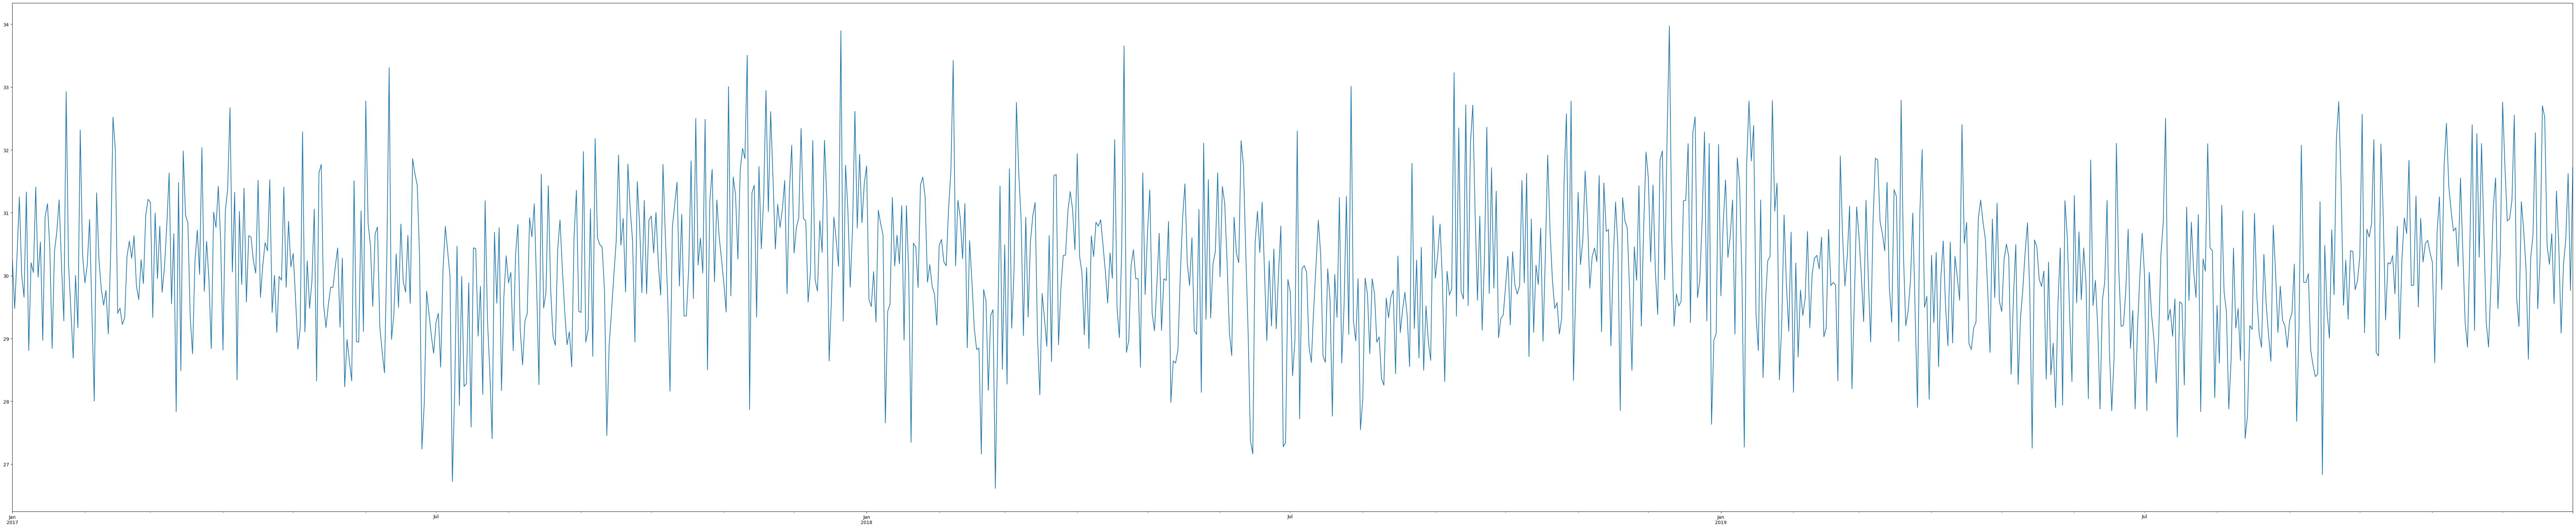

In [17]:
result_df_dynamic_with_noise['Energy_Generated_KWh'].plot(figsize=(100,20))

In [18]:
final_test = pd.concat([result_df_dynamic_with_noise, solar_position["apparent_zenith"], solar_position["azimuth"], total_irradiance_dynamic_with_noise], axis=1)
final_test.head()

,Energy_Generated_KWh,Temperature_C,apparent_zenith,azimuth,poa_global
2017-01-01,30.254286,20.507225,107.072437,110.407309,1344.634927
2017-01-02,29.477626,21.346532,107.169217,110.303927,1310.116719
2017-01-03,30.317197,22.463640,107.263767,110.192788,1347.430969
2017-01-04,31.252751,21.861981,107.355967,110.073943,1389.011161
2017-01-05,30.001559,22.533680,107.445699,109.947445,1333.402637


In [19]:
final_test.to_csv("gen_test_75kwh.csv")